<a href="https://www.kaggle.com/code/baselanaya/digits-recognizer-using-cnn?scriptVersionId=105444386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digit Recognizer using CNN

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

### Reading the dataset

In [2]:
shape = (28, 28, 1)
batch_size = 128

In [3]:
dtrain = pd.read_csv("../input/digit-recognizer/train.csv")
dtest = pd.read_csv("../input/digit-recognizer/test.csv")
dtrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Checking the test data
dtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Detecting Features and labels

In [5]:
labels = dtrain['label']
features = dtrain.drop(['label'], axis = 1)

In [6]:
features = np.asarray(features)
features.shape

(42000, 784)

In [7]:
features = features.reshape((42000, 28, 28))
features.shape

(42000, 28, 28)

In [8]:
labels = tf.keras.utils.to_categorical(labels)

## Ploting samples of the dataset

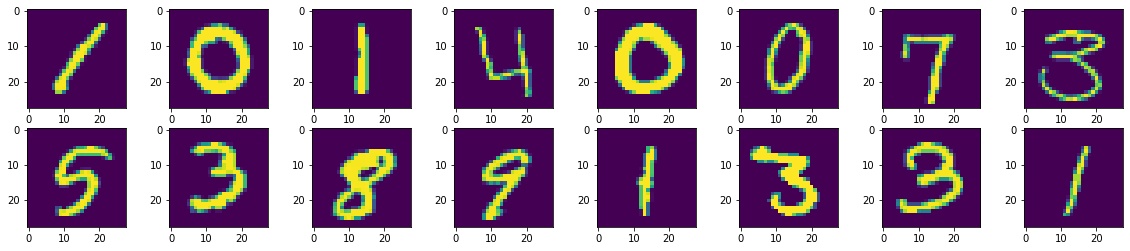

In [9]:
plt.figure(figsize = (20, 4))
for i in range(16):
  plt.subplot(2, 8, i + 1)
  plt.imshow(features[i])
plt.show()

In [10]:
# Now let's create the model
def create_model():
    left_input = tf.keras.layers.Input(shape = shape)
    filter = 32
    x = left_input
    for i in range(3):
        x = tf.keras.layers.Conv2D(filter,3, activation = "relu", padding = 'same')(x)
        x = tf.keras.layers.Dropout(0.4)(x)
        x = tf.keras.layers.MaxPooling2D()(x)
    filter*=2
    right_input = tf.keras.layers.Input(shape = shape)
    y = right_input
    filter = 32
    for i  in range(3):
        y = tf.keras.layers.Conv2D(filter,3, activation = "relu", padding = 'same', dilation_rate = 2)(y)
        y = tf.keras.layers.Dropout(0.4)(y)
        y = tf.keras.layers.MaxPooling2D()(y)
        filter*=2
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    y = tf.keras.layers.GlobalAveragePooling2D()(y)
    model = tf.keras.layers.concatenate([x, y])
    model = tf.keras.layers.Dropout(0.4)(model)
    output = tf.keras.layers.Dense(10, activation = "softmax")(model)
    model = tf.keras.models.Model([left_input, right_input], output)
    return model

In [11]:
model = create_model()
model.summary()

2022-09-12 00:33:42.921504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 00:33:43.069717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 00:33:43.070545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 00:33:43.072228: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
______________________________________________________________________________________________

### Ploting the Model

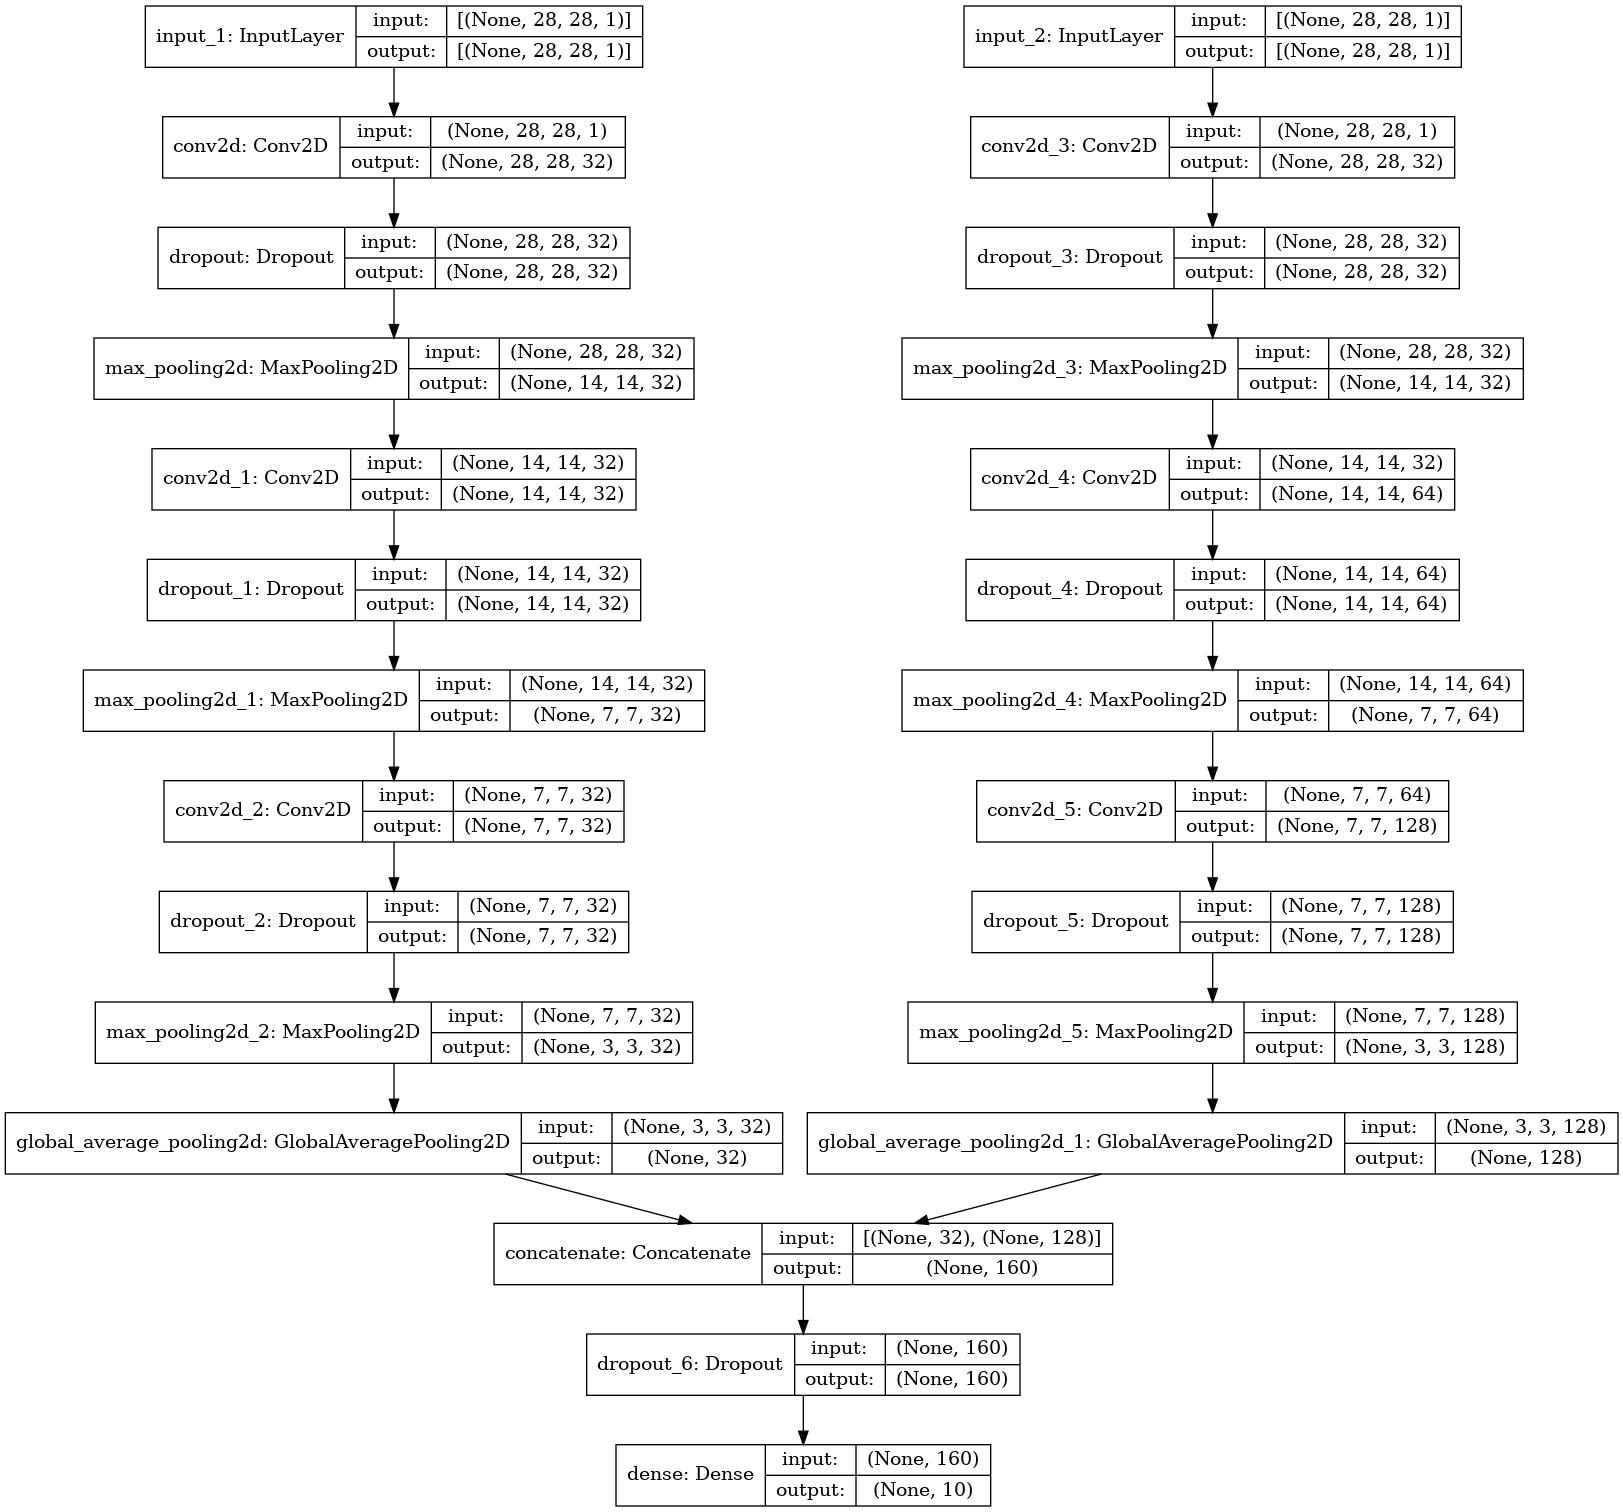

In [12]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [13]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "categorical_crossentropy", metrics = ['accuracy'])

In [14]:
history = model.fit([features, features], labels, batch_size=128, epochs=160, verbose=True, validation_split = 0.2,callbacks = [tf.keras.callbacks.EarlyStopping(patience= 20, monitor='val_loss', mode = 'min', restore_best_weights=True)])

2022-09-12 00:33:48.238059: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/160


2022-09-12 00:33:50.143728: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


263/263 [==============================] - 12s 14ms/step - loss: 2.8150 - accuracy: 0.6385 - val_loss: 0.5499 - val_accuracy: 0.9439
Epoch 2/160
263/263 [==============================] - 3s 12ms/step - loss: 0.3535 - accuracy: 0.8874 - val_loss: 0.3523 - val_accuracy: 0.9663
Epoch 3/160
263/263 [==============================] - 3s 12ms/step - loss: 0.2398 - accuracy: 0.9271 - val_loss: 0.2417 - val_accuracy: 0.9742
Epoch 4/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1946 - accuracy: 0.9414 - val_loss: 0.1905 - val_accuracy: 0.9755
Epoch 5/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1660 - accuracy: 0.9502 - val_loss: 0.1773 - val_accuracy: 0.9787
Epoch 6/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1437 - accuracy: 0.9569 - val_loss: 0.1695 - val_accuracy: 0.9811
Epoch 7/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1239 - accuracy: 0.9615 - val_loss: 0.1161 - val_accuracy: 0.9842
Epo

## The Results

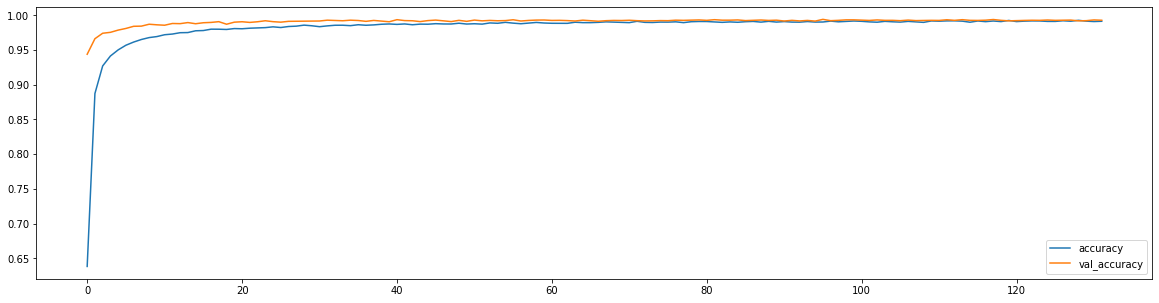

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.legend()

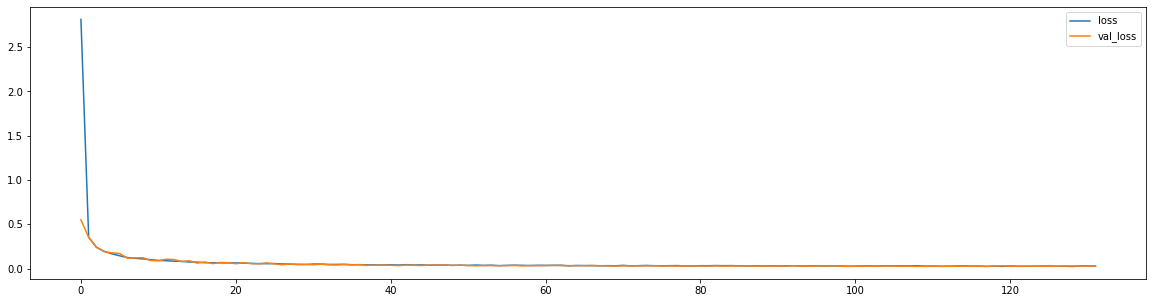

In [16]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label= "val_loss")
plt.legend()

## Model Evaluation

In [17]:
model.evaluate([features, features], labels, batch_size= 128)

329/329 [==============================] - 2s 5ms/step - loss: 0.0105 - accuracy: 0.9984


[0.010474618524312973, 0.9983571171760559]

In [18]:
features_test = np.asarray(dtest)
features_test.shape

(28000, 784)

In [19]:
features_test = features_test.reshape(features_test.shape[0], 28, 28)
y_pred = model.predict([features_test, features_test])
y_pred

array([[1.3241528e-07, 6.1239326e-08, 9.9997938e-01, ..., 1.9637266e-06,
        4.0988862e-06, 1.7071258e-08],
       [9.9988747e-01, 8.3135818e-09, 1.0548611e-05, ..., 4.2621171e-08,
        7.6627221e-06, 3.9921488e-06],
       [2.4131968e-09, 3.6112564e-08, 5.0848889e-06, ..., 1.1581146e-06,
        1.7510517e-02, 9.8228526e-01],
       ...,
       [7.5604475e-22, 4.3927112e-14, 2.9289589e-13, ..., 7.2290839e-13,
        3.2659386e-09, 2.8527083e-12],
       [6.6959513e-09, 3.2930698e-06, 1.6586513e-05, ..., 2.6500714e-03,
        6.9988137e-06, 9.9419111e-01],
       [3.7074831e-12, 8.8672861e-11, 9.9999940e-01, ..., 1.1125221e-08,
        1.6446021e-08, 1.0417904e-11]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [21]:
output = pd.DataFrame({'ImageId': dtest.index + 1, 'Label': y_pred.flatten()})
output.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
